<a href="https://colab.research.google.com/github/Sgewux/ml_from_scratch/blob/master/singular_value_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decompostion

The main pourpose of this notebook is to see through practical examples how SVD is capable of give us the directions that are capturing a higher amount of information.



*  First we will apply PCA to the "Iris Setosa" dataset, and see how we can represent the dataset with just one component capturing as much variance as we can.
*   Second, we will use SVD to re-build an image from the original one, making them as similar as posible using less information.



In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

*** No CODEPAGE record, no encoding_override: will use 'ascii'


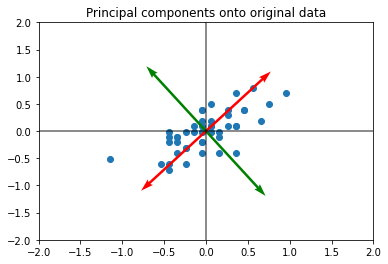

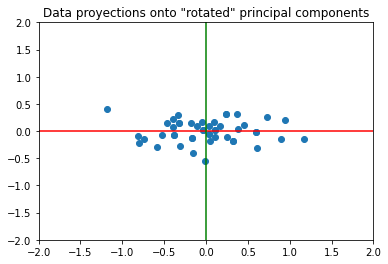

In [49]:
# Obtaining data from excel through pandas
df = pd.read_excel('./slr10.xls')
x = df['X'].values
y = df['Y'].values

# Centering the dada to perform PCA
x -= x.mean()
y -= y.mean()

# Reshaping data to stack it into a matrix
x = x.reshape((-1,1))
y = y.reshape((-1, 1))

# Stacking the data into a matrix
X = np.hstack((x, y))

# Singular Value Decompostion of that matrix
U, D, V = np.linalg.svd(X)
#w, va = np.linalg.eig(np.cov(X.T))

# Ploting the PCA'S onto the original scatterplot of the data
fig, ax = plt.subplots()
plt.title('Principal components onto original data')
ax.axhline(y=0, color='k', alpha=0.6)
ax.axvline(x=0, color='k', alpha=0.6)
plt.scatter(X[:,0], X[:,1])
plt.quiver(0, 0, V.T[:,0][0], V.T[:,0][1], scale=3.8, color=['red'])  # PCA1
plt.quiver(0, 0, V.T[:,1][0], V.T[:,1][1], scale=3.8, color=['green']) # PCA2
plt.quiver(0, 0, V.T[:,0][0]*-1, V.T[:,0][1]*-1, scale=3.8, color=['red']) # PCA1
plt.quiver(0, 0, V.T[:,1][0]*-1, V.T[:,1][1]*-1, scale=3.8, color=['green']) # PCA2
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

# "Rotating the PCA's" and writing the data onto them
S = np.vstack( ( np.diag(D), np.zeros( (46, 2) ) ) )  # Adding rows of zeros so as to make U and D compatible
NEW_X = U.dot(S) * -1  #  Multiplying by -1 so as to correct the SVD "sign ambiguity" 

fig, ax = plt.subplots()
plt.title('Data proyections onto "rotated" principal components')
ax.axhline(y=0, color='red', alpha=1)
ax.axvline(x=0, color='green', alpha=1)
plt.scatter(NEW_X[:,0], NEW_X[:,1])
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

# Re-building images

In [ ]:
def decompose_image(arr, n_pca):
  U, D, V = np.linalg.svd(arr)
  matrix = np.zeros(arr.shape)
  for i in range(n_pca):
    matrix += D[i] * U[:,i].reshape(-1,1) * V[i,:]
  return matrix


def compare_images(img_path, n_components):
  image = Image.open(img_path)
  image_gr = image.convert('LA')
  image = np.array(list(image_gr.getdata(band=0)), dtype=np.float64)
  image.shape = (image_gr.size[1], image_gr.size[0])

  plt.title('Original Image')
  plt.imshow(image, cmap='gray')
  plt.show()
  plt.title('Decomposed Image')
  plt.imshow(decompose_image(image, n_pca=n_components), cmap='gray')
  plt.show()

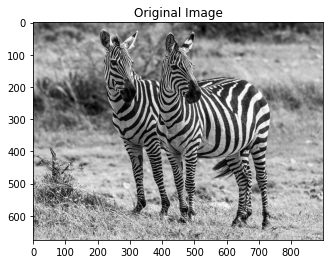

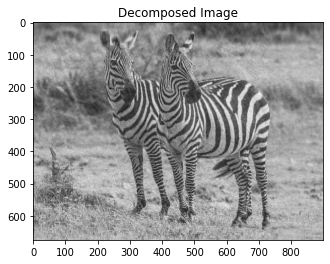

In [ ]:
compare_images('./zebras.jpg', 90)

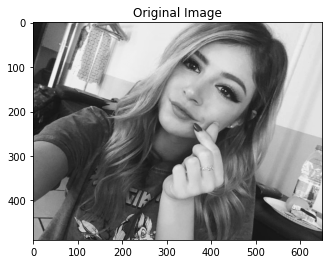

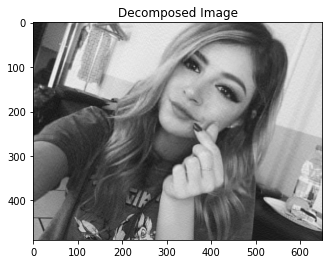

In [ ]:
compare_images('./chrissy.jpg', 90)

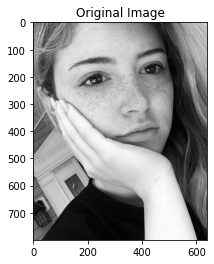

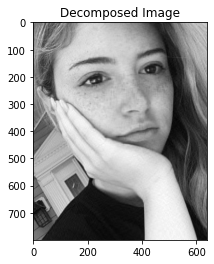

In [ ]:
compare_images('./chrissy2.jpg', 90)